In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [10]:
df = pd.read_csv("/home/elliot/bank-additional-full.csv",sep=";")
df2 = pd.read_csv('/home/elliot/bank-additional.csv', sep =';')
df.drop_duplicates(keep = 'first', inplace = True)
df2.drop('duration', axis = 1, inplace = True)
dfc=df
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
numerics = list(df.select_dtypes(include = ['int64', 'float64']).columns)
categoricals = list(df.select_dtypes(include = ['object']).columns)


In [15]:
features = [i for i in categoricals if(i!='y')]
print(features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [16]:
y = df.pop('y')
X = df[features]

In [18]:
le = LabelEncoder()
for x in features:
    X[x] = le.fit_transform(X[x])

<ipython-input-18-2ccdb2adde61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x] = le.fit_transform(X[x])


In [20]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [29]:
"Logistic Regression"

'Logistic Regression'

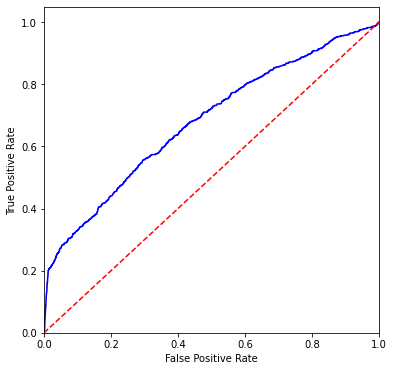

In [28]:
model = ('Logistic Regression', LogisticRegression())

names = []

for name, model in models:
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    names.append(name)
    

plt.figure(figsize = (6,6))
plt.plot(fpr[0], tpr[0], 'b-', label = 'Logistic Regression (area = %0.2f)' % roc_scores[0])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


In [44]:
"Ensemble Model"

'Ensemble Model'

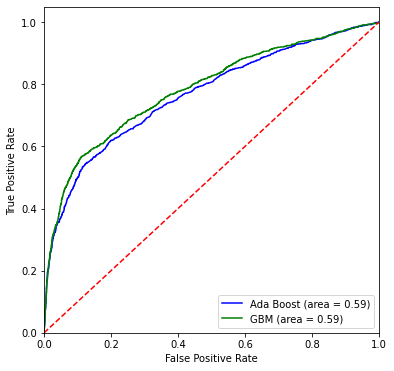

In [47]:
models_ensemble = [('Ada Boost', AdaBoostClassifier()),('GBM', GradientBoostingClassifier()), \
]

names_ensemble = []
roc_scores_ensemble = []
fpr_ensemble = []
tpr_ensemble = []
thresholds_ensemble = []

for name, model in models_ensemble:
    model.fit(X_train, y_train)
    
    pr = model.predict(X_test)
    

    sc = roc_auc_score(y_test, pr)
    roc_scores_ensemble.append(sc)
    

    f_e, t_e, th_e = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fpr_ensemble.append(f_e)
    tpr_ensemble.append(t_e)
    thresholds_ensemble.append(th_e)
    
    
    names_ensemble.append(name)
    

plt.figure(figsize = (6,6))
plt.plot(fpr_ensemble[0], tpr_ensemble[0], 'b-', label = 'Ada Boost (area = %0.2f)' % roc_scores_ensemble[0])
plt.plot(fpr_ensemble[1], tpr_ensemble[1], 'g-', label = 'GBM (area = %0.2f)' % roc_scores_ensemble[1])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
